In [1]:
!pip install nannyml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 104.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import nannyml as nml
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('creditcard.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print("\nSample records:")
df.head()

Dataset shape: (284807, 31)
Columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Sample records:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [10]:
# Define column names and other parameters
column_names = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Amount', 'Class']

# 'Class' is treated as a categorical variable
treat_as_categorical = ['Class']

# Timestamp column in this dataset
timestamp_column_name = None

In [12]:
# Define reference and analysis periods (70-30 Ratio)
reference_period_end = 200000  # Assuming reference period ends at this row index
reference_df = df.iloc[:reference_period_end]
analysis_df = df.iloc[reference_period_end:]
reference_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Univariate Drift Detection

In [13]:
# Instantiate and calibrate univariate drift
univariate_calculator = nml.UnivariateDriftCalculator(
    column_names=column_names,
    treat_as_categorical=treat_as_categorical,
    timestamp_column_name=timestamp_column_name,
    continuous_methods=['kolmogorov_smirnov', 'jensen_shannon'],
    categorical_methods=['chi2', 'jensen_shannon']
)

# Fit the calculator with reference data
univariate_calculator.fit(reference_df)

# Calculate drift results
results = univariate_calculator.calculate(analysis_df)

# Display drift results for a specific column (e.g., 'Amount')
display(results.filter(period='analysis', column_names=['Amount']).to_df())


chunk                                                        \
            chunk                                                         
              key chunk_index start_index end_index start_date end_date   
0        [0:8479]           0      200000    208479       None     None   
1    [8480:16959]           1      208480    216959       None     None   
2   [16960:25439]           2      216960    225439       None     None   
3   [25440:33919]           3      225440    233919       None     None   
4   [33920:42399]           4      233920    242399       None     None   
5   [42400:50879]           5      242400    250879       None     None   
6   [50880:59359]           6      250880    259359       None     None   
7   [59360:67839]           7      259360    267839       None     None   
8   [67840:76319]           8      267840    276319       None     None   
9   [76320:84799]           9      276320    284799       None     None   
10  [84800:84806]          10      284800    284806       None     None   

                         Amount                                         \
             kolmogorov_smirnov                                          
      period              value upper_threshold lower_threshold  alert   
0   analysis           0.025057        0.138514            None  False   
1   analysis           0.026822        0.138514            None  False   
2   analysis           0.032676        0.138514            None  False   
3   analysis           0.022576        0.138514            None  False   
4   analysis           0.013720        0.138514            None  False   
5   analysis           0.045217        0.138514            None  False   
6   analysis           0.057611        0.138514            None  False   
7   analysis           0.060795        0.138514            None  False   
8   analysis           0.101574        0.138514            None  False   
9   analysis           0.089947        0.138514            None  False   
10  analysis           0.222581        0.138514            None   True   

                                                          
   jensen_shannon                                         
            value upper_threshold lower_threshold  alert  
0        0.015996        0.035131            None  False  
1        0.022536        0.035131            None  False  
2        0.022035        0.035131            None  False  
3        0.020892        0.035131            None  False  
4        0.019344        0.035131            None  False  
5        0.022942        0.035131            None  False  
6        0.016435        0.035131            None  False  
7        0.027225        0.035131            None  False  
8        0.028287        0.035131            None  False  
9        0.033474        0.035131            None  False  
10       0.105216        0.035131            None   True

In [14]:
# Compute and visualize results across the entire dataset
univariate_figure = results.filter(column_names=['Amount'], methods=['jensen_shannon']).plot(kind='drift')
univariate_figure.show()

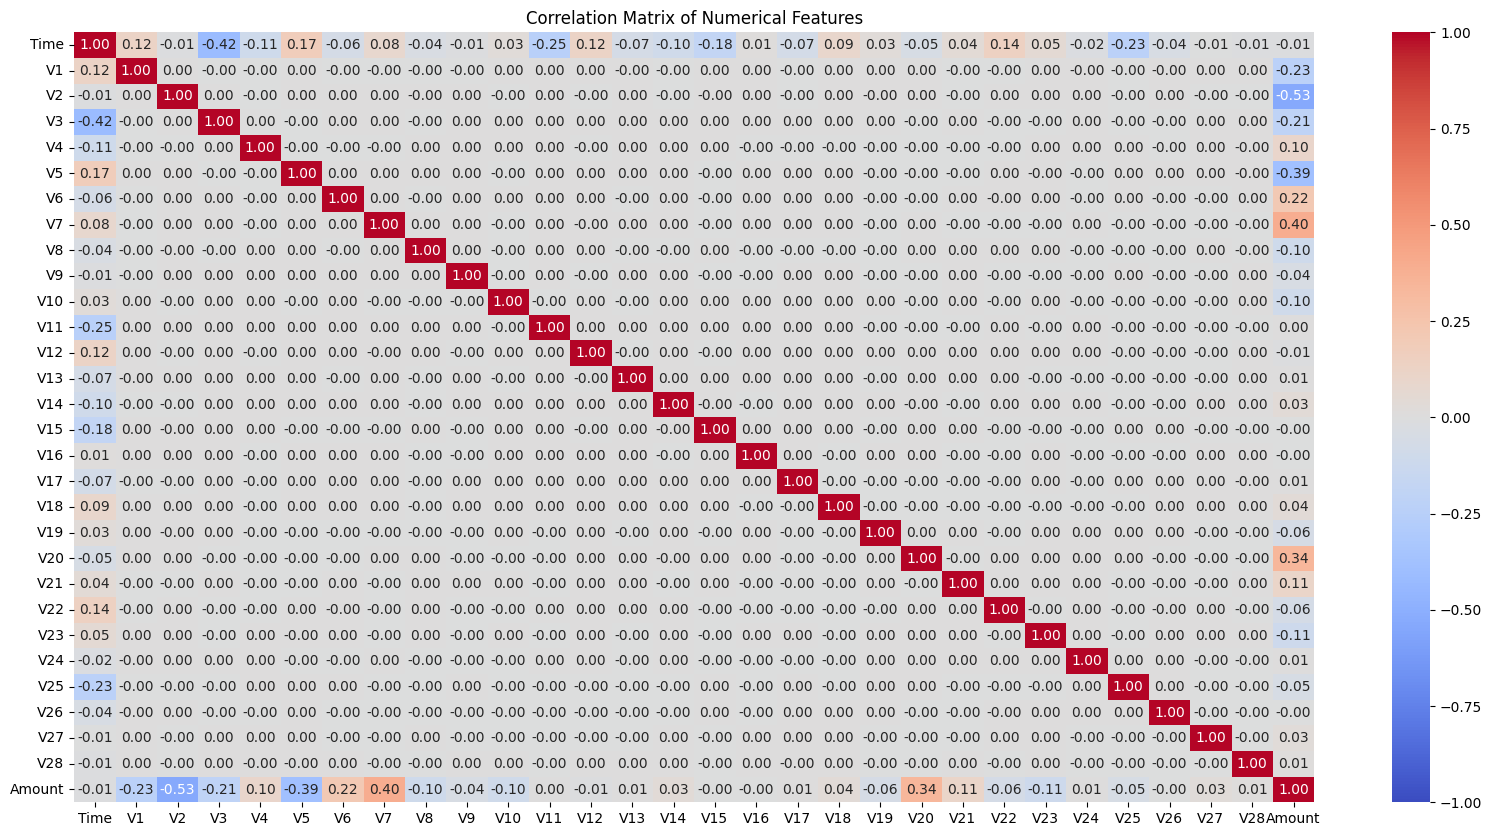

In [18]:
# Select only the numerical features (excluding 'Class' which is categorical)
numerical_features = df.drop(columns=['Class']).select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Multivariate Drift Detection

In [19]:
# Instantiate and fit the Domain Classifier
domain_classifier = nml.DomainClassifierCalculator(
    feature_column_names=column_names,
    treat_as_categorical=treat_as_categorical,
    timestamp_column_name=timestamp_column_name,
)
# Fit the domain classifier with reference data
domain_classifier.fit(reference_df)

# Calculate drift detection results for the analysis period
domain_classifier_results = domain_classifier.calculate(analysis_df)

# Display drift results from a multivariate analysis
display(domain_classifier_results.filter(period='analysis').to_df())

chunk                                                        \
              key chunk_index start_index end_index start_date end_date   
0        [0:8479]           0      200000    208479       None     None   
1    [8480:16959]           1      208480    216959       None     None   
2   [16960:25439]           2      216960    225439       None     None   
3   [25440:33919]           3      225440    233919       None     None   
4   [33920:42399]           4      233920    242399       None     None   
5   [42400:50879]           5      242400    250879       None     None   
6   [50880:59359]           6      250880    259359       None     None   
7   [59360:67839]           7      259360    267839       None     None   
8   [67840:76319]           8      267840    276319       None     None   
9   [76320:84799]           9      276320    284799       None     None   
10  [84800:84806]          10      284800    284806       None     None   

             domain_classifier_auroc                                        
      period                   value upper_threshold lower_threshold alert  
0   analysis                0.975326            0.65            0.45  True  
1   analysis                0.975655            0.65            0.45  True  
2   analysis                0.975345            0.65            0.45  True  
3   analysis                0.975903            0.65            0.45  True  
4   analysis                0.973863            0.65            0.45  True  
5   analysis                0.976197            0.65            0.45  True  
6   analysis                0.976249            0.65            0.45  True  
7   analysis                0.977211            0.65            0.45  True  
8   analysis                0.980356            0.65            0.45  True  
9   analysis                0.977886            0.65            0.45  True  
10  analysis                0.431874            0.65            0.45  True

In [20]:
# Visualize results across the entire dataset
domain_classifier_figure = domain_classifier_results.plot()
domain_classifier_figure.show()

# References

https://nannyml.readthedocs.io/en/stable/how_it_works/multivariate_drift.html#how-multiv-drift-dc
https://nannyml.readthedocs.io/en/stable/tutorials/detecting_data_drift/multivariate_drift_detection/dc.html#multivariate-drift-detection-dc